In [2]:
# Import Important Pkgs
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [3]:
df = pd.read_csv('worldcup_data/international_matches.csv')
df.head(30)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(23921, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

## Rearragning dataset

In [47]:
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']]
fifa_rank.head()

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points
0,1993-08-08,Bolivia,Uruguay,59,22,0,0
1,1993-08-08,Brazil,Mexico,8,14,0,0
2,1993-08-08,Ecuador,Venezuela,35,94,0,0
3,1993-08-08,Guinea,Sierra Leone,65,86,0,0
4,1993-08-08,Paraguay,Argentina,67,5,0,0


In [9]:
home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank', 'home_team_total_fifa_points']].rename(columns = {'home_team':'team', 'home_team_fifa_rank':'rank', 'home_team_total_fifa_points':'fifa_points'}) 

home.head()

,date,team,rank,fifa_points
0,1993-08-08,Bolivia,59,0
1,1993-08-08,Brazil,8,0
2,1993-08-08,Ecuador,35,0
3,1993-08-08,Guinea,65,0
4,1993-08-08,Paraguay,67,0


In [10]:
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank', 'away_team_total_fifa_points']].rename(columns = {'away_team':'team', 'away_team_fifa_rank':'rank', 'away_team_total_fifa_points':'fifa_points'}) 

away.head()

,date,team,rank,fifa_points
0,1993-08-08,Uruguay,22,0
1,1993-08-08,Mexico,14,0
2,1993-08-08,Venezuela,94,0
3,1993-08-08,Sierra Leone,86,0
4,1993-08-08,Argentina,5,0


In [11]:
fifa_rank = home.append(away)

fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending = [True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_from_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number', axis = 1).nsmallest(10, 'rank')

# Find the top five strongest teams
fifa_rank_from_top.head()

,date,team,rank,fifa_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761


In [12]:
# Check if there is any null value
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'Columns containing \'null\' values: \n{columns_contains_null}')

Columns containing 'null' values: 
['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


#### From the data_set that contains all the international match results, select only the teams that are qualified for WC 2022

In [13]:
WC_2022 = ['Argentina', 'Brazil', 'England', 'France', 'Spain', 'Belgium', 'Portugal', 'Germany', 'Netherlands', 'Uruguay', 'Croatia', 
           'Denmark', 'Mexico', 'USA', 'Senegal', 'Wales', 'Poland', 'Australia', 'Japan', 'Morocco', 'Switzerland', 'Ghana',
           'Korea Republic', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 'Tunisia', 'Saudi Arabia', 'IR Iran', 'Ecuador', 'Qatar']
len(WC_2022)

32

In [14]:
# Fill in all empty values of the columns identified above
for x in WC_2022:
    for y in columns_contains_null:
        df[y].fillna(df[df[y[0:9]]==x][y].mean(), inplace = True)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

# Exploratory Data Analysis

### To identify features that could influence the world-cup winning possibility, following questions will be answered

1. Is there a home advantage?
3. Probability of weakest team winning the strongest team?
4. Do teams with stronger offense score score more goals?
5. Do teams with stronger goalkeeper concede fewer goals?
6. What are the top 10 teams with the longest win streak?
7. Better team win percentage as a home team or away team?
8. Which team has each the best goalkeeper, defense, midfield, and offense?
9. What are the top 15 highest winning percentage team?

## Question 1: Is there a home advantage?

In [15]:
home_team_results = df[['country', 'home_team_score', 'away_team_score']]
home_team_results.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
1,Brazil,1,1
2,Ecuador,5,0
3,Guinea,1,0
4,Paraguay,1,3


In [16]:
home_wins = home_team_results.loc[home_team_results['home_team_score']>home_team_results['away_team_score']]
home_losses = home_team_results.loc[home_team_results['home_team_score']<home_team_results['away_team_score']]
home_wins.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0


In [17]:
print('Home teams are '+ str(len(home_wins)/len(home_losses))+" times likely to win when they are playing at home")

Home teams are 1.7501132417333534 times likely to win when they are playing at home


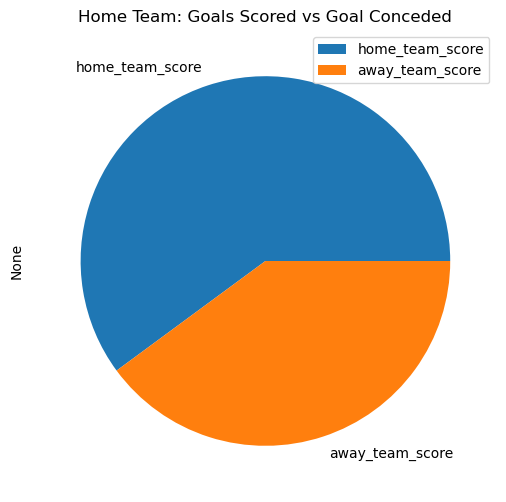

In [18]:
home_team_results.mean().plot(kind = 'pie', title = 'Home Team: Goals Scored vs Goal Conceded', labels = ['home_team_score', 'away_team_score'], figsize = (15,6))
plt.legend()

### Question 1 Answer: 
- There is a home advantage.
- Hometeams are likely to score more goals and concede less goals than the away team

## Question 2: Probability of weakest team winning the strongest team?

In [48]:
# Calculate the percentages of win, draw, and lose 
def win(team1, team2, team1_rank, team2_rank, team1_score, team2_score):
    if team1_score > team2_score:
        winner = team1
    elif team1_score == team2_score:
        winner = 'Drawn'
    else:
        winner = team2
    return winner

In [49]:
# Create dataframe of that contains the winning team of the match
df['winner'] = df.apply(lambda x: win (x['home_team'], x['away_team'], 
                                          x['home_team_fifa_rank'], x['away_team_fifa_rank'], 
                                         x['home_team_score'], x['away_team_score']), axis = 1)

df['winner']

0               Bolivia
1                 Drawn
2               Ecuador
3                Guinea
4             Argentina
              ...      
23916           Moldova
23917            Latvia
23918             Drawn
23919           Tunisia
23920    Korea Republic
Name: winner, Length: 23921, dtype: object

In [21]:
# Which team was ranked higher?
def rank(team_h, team_a, rank_h, rank_a):
    if rank_h < rank_a:
        return team_h
    else:
        return team_a

In [22]:
# Create dataframe of that contains the higher ranked team of the match
df['higher_rank'] = df.apply(lambda x: rank(x['home_team'], x['away_team'], 
                                          x['home_team_fifa_rank'], x['away_team_fifa_rank']), axis=1)

df['higher_rank']

0               Uruguay
1                Brazil
2               Ecuador
3                Guinea
4             Argentina
              ...      
23916           Andorra
23917            Latvia
23918             Chile
23919             Japan
23920    Korea Republic
Name: higher_rank, Length: 23921, dtype: object

In [50]:
def rank_result(winner, higher_rank):
    if winner == 'Drawn':
        return winner
    if winner == higher_rank:
        return 'Higher_Rank_Win'
    else:
        return 'Lower_Rank_Win'

In [51]:
df['resulting_rank'] = df.apply(lambda x: rank_result(x['winner'], x['higher_rank']), axis =1) 

df['resulting_rank']

0         Lower_Rank_Win
1                  Drawn
2        Higher_Rank_Win
3        Higher_Rank_Win
4        Higher_Rank_Win
              ...       
23916     Lower_Rank_Win
23917    Higher_Rank_Win
23918              Drawn
23919     Lower_Rank_Win
23920    Higher_Rank_Win
Name: resulting_rank, Length: 23921, dtype: object

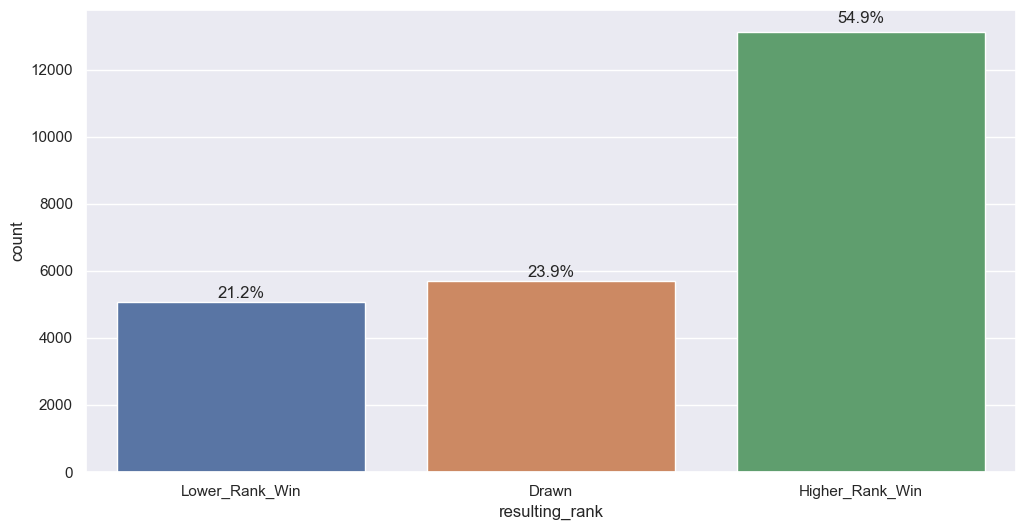

In [53]:
plt.figure(figsize = (12, 6))
total = float(len(df))
ax = sns.countplot(x = 'resulting_rank', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x+width/2, y+height*1.02), ha='center')
    
plt.show()

### Question 2 Answer: 
- Higher Ranked team are likely to win the match by 54.9%
- Lower Ranked team are likely to lose the match by 21.2%

## Question 3: Do teams with stronger offense score more goals?

In [26]:
# Rank team with by their mean offense scores

offense_scores = []
for team in WC_2022:
    scores = np.round((df[df["home_team"] == team]['home_team_mean_offense_score'].mean()+df[df["away_team"] == team]['away_team_mean_offense_score'].mean())/2, 2)
    offense_scores.append(scores)
    
offense_scores = pd.DataFrame({'Team': WC_2022, 'Offense Score': offense_scores}).sort_values('Offense Score', ascending = False).reset_index(drop=True)

offense_scores.index+=1

offense_scores

,Team,Offense Score
1,Argentina,88.25
2,Qatar,88.25
3,Brazil,87.29
4,Spain,86.65
5,France,86.64
6,Netherlands,86.46
7,England,86.20
8,Portugal,86.02
9,Germany,85.38
10,Uruguay,85.32


In [27]:
goal_conceded_home, goal_scored_home, goal_conceded_away, goal_scored_away = [],[],[],[]
total_goals_scored, total_goals_conceded = [], []

for team in WC_2022: 
    g_conceded_h = df[df['home_team']== team]['away_team_score'].sum() # number of goal scored by the away team
    g_scored_h = df[df['home_team']== team]['home_team_score'].sum() # number of goal scored by the home team
    g_conceded_a = df[df['away_team']== team]['home_team_score'].sum() # number of goal scored by the home team
    g_scored_a = df[df['away_team']== team]['away_team_score'].sum() # number of goal scored by the away team
    
    total_conceded = np.add(g_conceded_h, g_conceded_a)
    total_scored = np.add(g_scored_h, g_scored_a)
    
    goal_conceded_home.append(g_conceded_h)
    goal_scored_home.append(g_scored_h)
    goal_conceded_away.append(g_conceded_a)
    goal_scored_away.append(g_scored_a)
    
    total_goals_scored.append(total_scored)
    total_goals_conceded.append(total_conceded)

goals = pd.DataFrame({'Team':WC_2022, "Goals as Home": goal_scored_home, "Goals as Away": goal_scored_away,
                      'Total Scored Goals': total_goals_scored, "Conceded as Home": goal_conceded_home, 
                      "Conceded as Away": goal_conceded_away, 'Total Conceded Goals': total_goals_conceded})

goals['Goal Difference'] = goals['Total Scored Goals']-goals['Total Conceded Goals']
goals['Goal/Concede Ratio'] = goals['Total Scored Goals']/goals['Total Conceded Goals']

goals = goals.sort_values('Goal Difference', ascending = False).reset_index(drop=True)
goals.index += 1

In [28]:
goals # dataframe that stores all goal related information

,Team,Goals as Home,Goals as Away,Total Scored Goals,Conceded as Home,Conceded as Away,Total Conceded Goals,Goal Difference,Goal/Concede Ratio
1,Brazil,558,396,954,141,159,300,654,3.180000
2,Spain,469,312,781,107,141,248,533,3.149194
3,Germany,544,331,875,220,171,391,484,2.237852
4,IR Iran,425,288,713,115,165,280,433,2.546429
5,Netherlands,426,274,700,145,142,287,413,2.439024
6,France,447,223,670,154,112,266,404,2.518797
7,Portugal,424,244,668,124,144,268,400,2.492537
8,England,384,246,630,132,119,251,379,2.509960
9,Japan,533,243,776,273,153,426,350,1.821596
10,Mexico,572,286,858,272,247,519,339,1.653179


In [29]:
Rank_by_offense = offense_scores.merge(goals, on='Team')[['Team', 'Offense Score', 'Total Scored Goals']]
Rank_by_total_goals = Rank_by_offense.sort_values('Total Scored Goals', ascending = False).reset_index(drop=True)

Rank_by_total_goals

,Team,Offense Score,Total Scored Goals
0,Brazil,87.29,954
1,Germany,85.38,875
2,Mexico,82.80,858
3,Spain,86.65,781
4,Japan,79.23,776
5,Saudi Arabia,83.56,762
6,USA,80.79,761
7,IR Iran,82.78,713
8,Netherlands,86.46,700
9,Korea Republic,80.46,685


Text(0.5, 1.0, 'Top 10 teams with highest offense scores')

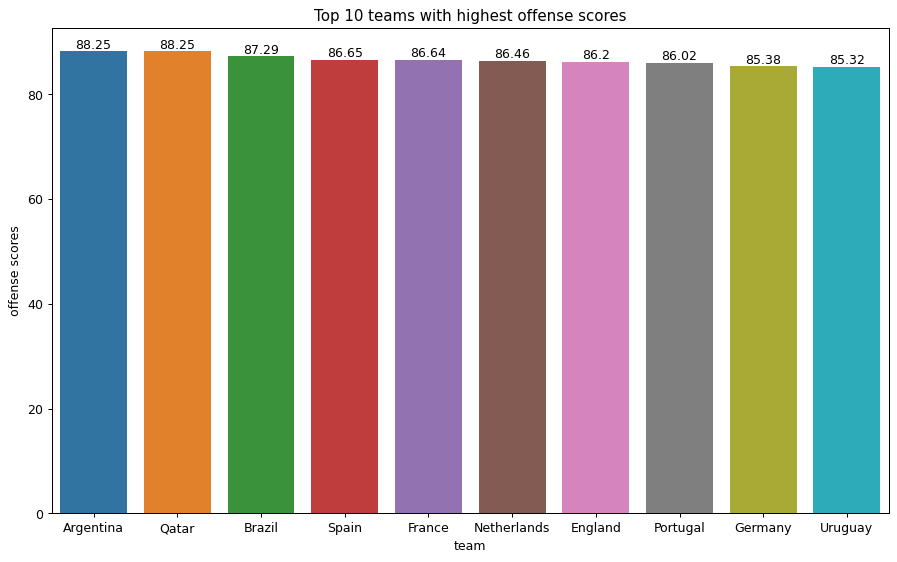

In [30]:
# Plot Rank by Offense Score
plt.figure(figsize = (12, 7), dpi=90)
ax = sns.barplot(data=Rank_by_offense[:10], x = 'Team', y = 'Offense Score')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('offense scores')
plt.title('Top 10 teams with highest offense scores')

Text(0.5, 1.0, 'Top 10 teams with most goals scored')

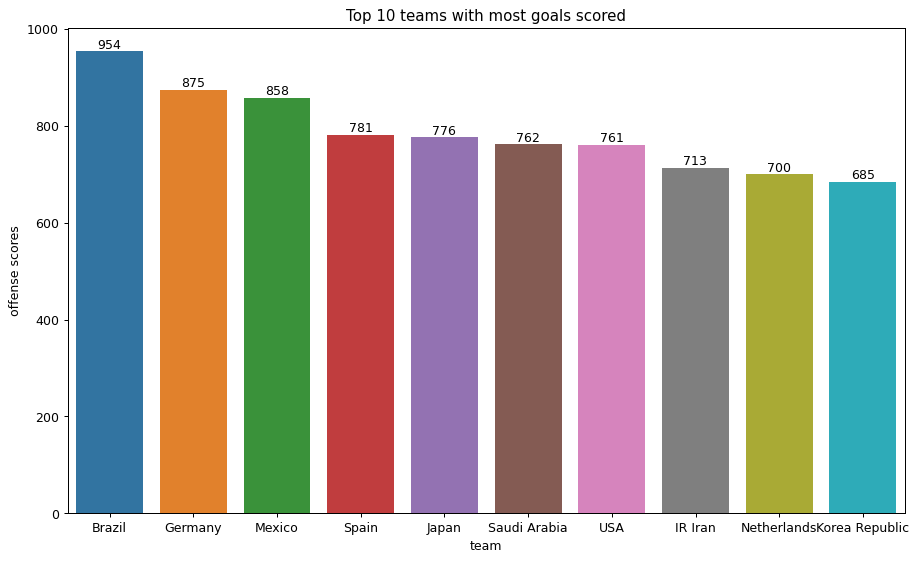

In [31]:
# Plot Rank by Total Goals Scored
plt.figure(figsize = (12, 7), dpi=90)
ax = sns.barplot(data=Rank_by_total_goals[:10], x= 'Team', y = 'Total Scored Goals')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('offense scores')
plt.title('Top 10 teams with most goals scored')

## Question 3 Answer:
- The result of the two table does not allign with each other in which there are only four teams that are in the both top 10s.
- To gain more insight, might need to compare the number of matches because team that played more games could have scored more goals. Also, there are a lot of asian teams that are included in teams who scored most goal who weren't in the teams who had the highest offense score.

In [32]:
# Highest Win Percentage
hwins, hdraws, hloses = [],[],[]
awins, adraws, aloses = [],[],[]

for team in WC_2022:
    home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
    home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
    home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]

    away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
    away_lose = df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)

In [33]:
results = pd.DataFrame({'Team':WC_2022, 'Win': wins, 'Draw': draws, 'Lose': loses,
                       'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                       'Away win': awins, 'Away draw': adraws, 'Away lose': aloses,})

results.insert(1, 'Total Games', results['Win']+results['Draw']+results['Lose'])
results.insert(8, 'Total Home Games', results['Home win']+results['Home draw']+results['Home lose'])
results.insert(12, 'Total Away Games', results['Away win']+results['Away draw']+results['Away lose'])

results['Win %'] = np.round(100*results['Win']/results['Total Games'], 2)
results['Draw %'] = np.round(100*results['Draw']/results['Total Games'], 2)
results['Lose %'] = np.round(100*results['Lose']/results['Total Games'], 2)

results['Home Win %'] = np.round(100*results['Home win']/results['Total Home Games'], 2)
results['Home Draw %'] = np.round(100*results['Home draw']/results['Total Home Games'], 2)
results['Home Lose %'] = np.round(100*results['Home lose']/results['Total Home Games'], 2)

results['Away Win %'] = np.round(100*results['Away win']/results['Total Away Games'], 2)
results['Away Draw %'] = np.round(100*results['Away draw']/results['Total Away Games'], 2)
results['Away Lose %'] = np.round(100*results['Away lose']/results['Total Away Games'], 2)

results = results.sort_values('Win %', ascending=False).reset_index(drop=True)
results.index += 1

results.head(10)

,Team,Total Games,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home Games,Away win,...,Total Away Games,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,...,200,69.52,17.55,12.93,77.68,13.30,9.01,60.00,22.50,17.50
2,Spain,354,246,64,44,145,27,17,189,101,...,165,69.49,18.08,12.43,76.72,14.29,8.99,61.21,22.42,16.36
3,France,370,230,83,57,145,44,32,221,85,...,149,62.16,22.43,15.41,65.61,19.91,14.48,57.05,26.17,16.78
4,Germany,390,240,82,68,139,44,36,219,101,...,171,61.54,21.03,17.44,63.47,20.09,16.44,59.06,22.22,18.71
5,IR Iran,366,217,79,70,133,31,27,191,84,...,175,59.29,21.58,19.13,69.63,16.23,14.14,48.00,27.43,24.57
6,Netherlands,340,201,74,65,119,40,33,192,82,...,148,59.12,21.76,19.12,61.98,20.83,17.19,55.41,22.97,21.62
7,Portugal,336,198,79,59,123,37,24,184,75,...,152,58.93,23.51,17.56,66.85,20.11,13.04,49.34,27.63,23.03
8,Argentina,367,216,79,72,130,36,24,190,86,...,177,58.86,21.53,19.62,68.42,18.95,12.63,48.59,24.29,27.12
9,England,334,196,75,63,124,38,32,194,72,...,140,58.68,22.46,18.86,63.92,19.59,16.49,51.43,26.43,22.14
10,Croatia,320,172,79,69,92,38,24,154,80,...,166,53.75,24.69,21.56,59.74,24.68,15.58,48.19,24.70,27.11


Text(0.5, 1.0, 'Top 10 teams with the highest winning percentage')

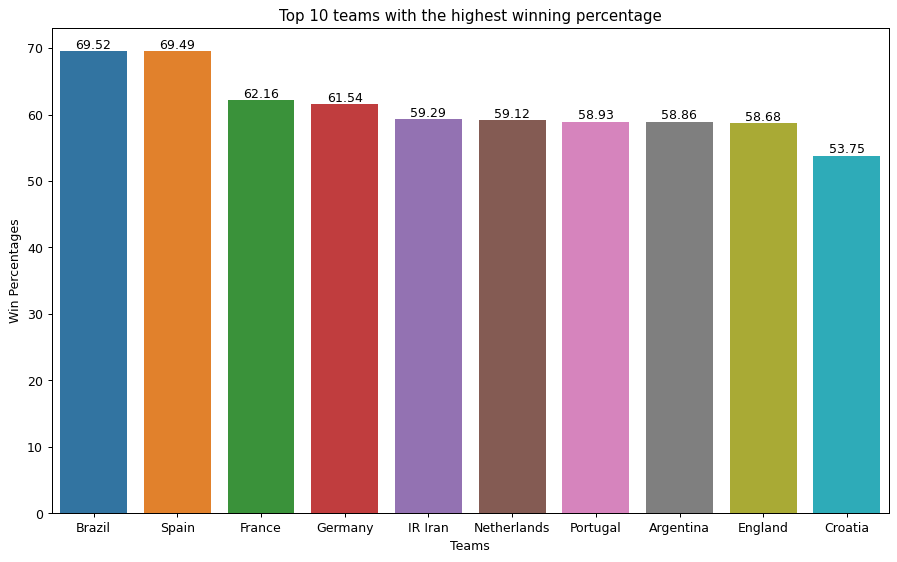

In [34]:
plt.figure(figsize=(12, 7), dpi = 90)
ax=sns.barplot(data=results[:10], x='Team', y='Win %')
ax.bar_label(ax.containers[0])
plt.xlabel('Teams')
plt.ylabel('Win Percentages')
plt.title('Top 10 teams with the highest winning percentage')

# Model Building

In [55]:
# Importing Neccessary ML Pkgs
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Prediction using logistic regression

In [56]:
# Feature Engineering
df['rank difference'] = df['home_team_fifa_rank']-df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank']+df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points']-df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score']-df['away_team_score']
df['game_won'] = df['score_difference'] > 0
df['unfriendly'] = df['tournament'] != 'Friendly'

In [37]:
X, y = df.loc[:,['rank difference', 'average_rank', 'point_difference']], df['game_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)

log_reg = linear_model.LogisticRegression(C = 1e-5)
features = PolynomialFeatures(degree=2)

model = Pipeline([
    ('Polynomial_features', features),
    ('logistic_regression', log_reg)
])

model = model.fit(X_train, y_train)

Text(0.5, 1.0, 'AUC score is 0.74')

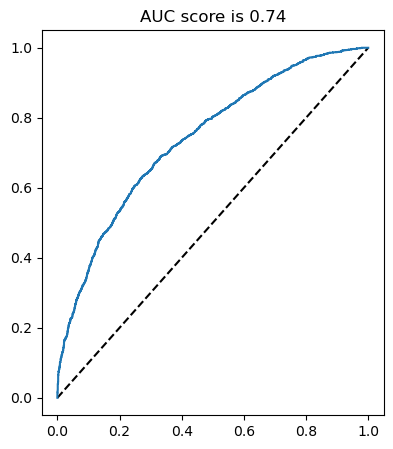

In [38]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0,1], [0,1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))

In [39]:
home_ranking = df[['home_team', 'home_team_fifa_rank', 'home_team_total_fifa_points']].loc[df['home_team'].isin(WC_2022)]
away_ranking = df[['away_team', 'away_team_fifa_rank', 'away_team_total_fifa_points']].loc[df['away_team'].isin(WC_2022)]
home_ranking = home_ranking.set_index(['home_team'])

In [40]:
home_ranking = home_ranking.groupby('home_team').mean()
away_ranking = away_ranking.groupby('away_team').mean()

In [41]:
home_ranking.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'IR Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Spain', 'Switzerland', 'Tunisia', 'USA',
       'Uruguay', 'Wales'],
      dtype='object', name='home_team')

In [42]:
home_ranking.head()

,home_team_fifa_rank,home_team_total_fifa_points
home_team,,
Argentina,6.794737,575.268421
Australia,50.970414,279.000000
Belgium,24.092025,635.705521
Brazil,3.459227,529.716738
Cameroon,40.060000,383.786667


In [43]:
from tqdm import tqdm

df_final, results_final, df_semifinal, results_semifinal, df_quarterfinal, results_quarterfinal, df_round16, results_round16  = ([] for i in range(8))

n_simulations = 1000 # define number of repetitions to run the simulation

for k in tqdm(range(n_simulations)):
    winner_candidates = ['Senegal', 'Netherlands', 'England', 'USA', 'Argentina', 'Poland', 'France', 'Denmark', 'Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal', 'Uruguay']
    stages = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for j in stages:
        iterations = int(len(winner_candidates)/2)
        print('STEP:', iterations)
        winners = []
        prob = []
        
        for i in range(iterations):
            home = winner_candidates[i*2]
            away = winner_candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = home_ranking.loc[home, 'home_team_fifa_rank']
            home_points = home_ranking.loc[home, 'home_team_total_fifa_points']
            opponent_rank = away_ranking.loc[home, 'away_team_fifa_rank']
            opponent_points = away_ranking.loc[home, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opponent_rank)/2
            row['rank difference'] = home_rank - opponent_rank
            row['point_difference'] = home_points-opponent_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if outcome <= 0.5 else winners.append(home) # threshold prob for winning is set as 0.5
            prob.append(1-outcome) if outcome <= 0.5 else prob.append(outcome)
            
            # GROUP STAGE 
        if j == 'round_of_16':
            stage_16 = ['round_16'] * 8
            candidates_round_16 = zip(stage_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step', 'Team', 'Prob'])
            df_round16.append(df_candidates_round_16)
            results_round16.append(winners)
            
            # KNOCKOUT STAGE 
        if j == 'quarterfinal':
            stage_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(stage_quarterfinal, winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step', 'Team', 'Prob'])
            df_quarterfinal.append(df_candidates_quarterfinal)
            results_quarterfinal.append(winners)
        if j == 'semifinal':
            stage_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(stage_semifinal, winners, prob)
            df_candidates_semifinal= pd.DataFrame(candidates_semifinal, columns = ['Step', 'Team', 'Prob'])
            df_semifinal.append(df_candidates_semifinal)
            results_semifinal.append(winners)
        if j == 'final':
            stage_final = ['final']
            candidates_final = zip(stage_final, winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step', 'Team', 'Prob'])
            df_final.append(df_candidates_final)
            results_final.append(winners)
            
        list_of_winners = list(zip(winners, prob))
        print(list_of_winners)
        winner_candidates = winners

df_candidnates_round_16 = pd.concat(df_round16)
df_candidnates_quarterfinal = pd.concat(df_quarterfinal)
df_candidnates_semifinal = pd.concat(df_semifinal)
df_candidnates_final = pd.concat(df_final)

df_results = pd.concat([df_candidnates_round_16, df_candidnates_quarterfinal, df_candidnates_semifinal, df_candidnates_final])

results_round16 = sum(results_round16, [])
results_quarterfinal = sum(results_quarterfinal, [])
results_semifinal = sum(results_semifinal, [])
results_final = sum(results_final, [])

  0%|                                          | 2/1000 [00:00<01:18, 12.68it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croati

  1%|▎                                         | 6/1000 [00:00<01:23, 11.91it/s]

[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Serbia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8


  1%|▎                                         | 8/1000 [00:00<01:20, 12.36it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8


  1%|▍                                        | 10/1000 [00:00<01:27, 11.36it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2


  1%|▌                                        | 14/1000 [00:01<01:21, 12.09it/s]

[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


  2%|▋                                        | 16/1000 [00:01<01:20, 12.15it/s]

[('England', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2


  2%|▋                                        | 18/1000 [00:01<01:24, 11.56it/s]

[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2


  2%|▉                                        | 22/1000 [00:01<01:20, 12.10it/s]

[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8


  3%|█                                        | 26/1000 [00:02<01:15, 12.84it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Croatia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


  3%|█▏                                       | 28/1000 [00:02<01:17, 12.51it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('England', 1)]
STEP: 8


  3%|█▎                                       | 32/1000 [00:02<01:14, 12.94it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8


  3%|█▍                                       | 34/1000 [00:02<01:21, 11.92it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8


  4%|█▍                                       | 36/1000 [00:02<01:20, 12.00it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


  4%|█▋                                       | 40/1000 [00:03<01:26, 11.13it/s]

[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentin

  4%|█▊                                       | 44/1000 [00:03<01:21, 11.70it/s]

[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2


  5%|█▉                                       | 46/1000 [00:03<01:25, 11.18it/s]

[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8


  5%|█▉                                       | 48/1000 [00:04<01:29, 10.66it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1


  5%|██                                       | 50/1000 [00:04<01:22, 11.50it/s]

[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


  5%|██▏                                      | 52/1000 [00:04<01:35,  9.89it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


  5%|██▏                                      | 54/1000 [00:04<01:38,  9.64it/s]

[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1


  6%|██▍                                      | 58/1000 [00:05<01:35,  9.90it/s]

[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]


  6%|██▌                                      | 62/1000 [00:05<01:24, 11.06it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), 

  6%|██▌                                      | 64/1000 [00:05<01:25, 10.98it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


  7%|██▋                                      | 66/1000 [00:05<01:22, 11.25it/s]

[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


  7%|██▊                                      | 70/1000 [00:06<01:16, 12.12it/s]

[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('P

  8%|███                                      | 76/1000 [00:06<01:12, 12.73it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgi

  8%|███▏                                     | 78/1000 [00:06<01:12, 12.65it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


  8%|███▎                                     | 82/1000 [00:06<01:06, 13.72it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Serbia

  9%|███▌                                     | 86/1000 [00:07<01:11, 12.84it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


  9%|███▌                                     | 88/1000 [00:07<01:07, 13.42it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


  9%|███▊                                     | 92/1000 [00:07<01:09, 13.11it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('G

  9%|███▊                                     | 94/1000 [00:07<01:14, 12.22it/s]

[('France', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8


 10%|████                                     | 98/1000 [00:08<01:03, 14.16it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Sp

 10%|████                                    | 101/1000 [00:08<00:54, 16.52it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]


 10%|████                                    | 103/1000 [00:08<01:04, 13.91it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1


 11%|████▎                                   | 107/1000 [00:08<01:17, 11.47it/s]

[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 11%|████▎                                   | 109/1000 [00:09<01:15, 11.82it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 11%|████▌                                   | 113/1000 [00:09<01:16, 11.57it/s]

[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 12%|████▋                                   | 117/1000 [00:09<01:10, 12.52it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8


 12%|████▊                                   | 119/1000 [00:09<01:13, 11.91it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8


 12%|████▉                                   | 123/1000 [00:10<01:09, 12.63it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8


 12%|█████                                   | 125/1000 [00:10<01:13, 11.90it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


 13%|█████                                   | 127/1000 [00:10<01:14, 11.67it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 13%|█████▏                                  | 131/1000 [00:11<01:18, 11.12it/s]

[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]


 13%|█████▎                                  | 133/1000 [00:11<01:18, 11.00it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8


 14%|█████▍                                  | 135/1000 [00:11<01:23, 10.33it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8


 14%|█████▍                                  | 137/1000 [00:11<01:26, 10.02it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2


 14%|█████▌                                  | 139/1000 [00:11<01:21, 10.58it/s]

[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8


 14%|█████▋                                  | 141/1000 [00:12<01:23, 10.26it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 14%|█████▊                                  | 144/1000 [00:12<01:38,  8.65it/s]

[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8


 15%|█████▊                                  | 146/1000 [00:12<01:34,  9.08it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 15%|█████▉                                  | 148/1000 [00:12<01:27,  9.75it/s]

[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 15%|██████                                  | 152/1000 [00:13<01:19, 10.63it/s]

[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1),

 15%|██████▏                                 | 154/1000 [00:13<01:12, 11.69it/s]

[('France', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 16%|██████▎                                 | 158/1000 [00:13<01:19, 10.53it/s]

[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8


 16%|██████▍                                 | 160/1000 [00:13<01:26,  9.67it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2


 16%|██████▍                                 | 162/1000 [00:14<01:23, 10.08it/s]

[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 17%|██████▋                                 | 166/1000 [00:14<01:13, 11.38it/s]

[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 17%|██████▋                                 | 168/1000 [00:14<01:20, 10.34it/s]

[('England', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 17%|██████▊                                 | 170/1000 [00:14<01:22, 10.05it/s]

[('England', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 17%|██████▉                                 | 172/1000 [00:15<01:24,  9.83it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


 18%|███████                                 | 176/1000 [00:15<01:21, 10.12it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spa

 18%|███████▏                                | 180/1000 [00:15<01:09, 11.76it/s]

[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 18%|███████▎                                | 184/1000 [00:16<01:12, 11.25it/s]

[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland'

 19%|███████▌                                | 188/1000 [00:16<01:10, 11.53it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8


 19%|███████▌                                | 190/1000 [00:16<01:04, 12.49it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Be

 19%|███████▊                                | 194/1000 [00:16<01:05, 12.25it/s]

[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[

 20%|████████                                | 201/1000 [00:17<00:48, 16.49it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Ger

 20%|████████                                | 203/1000 [00:17<00:52, 15.19it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2


 20%|████████▏                               | 205/1000 [00:17<00:56, 14.06it/s]

[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 21%|████████▎                               | 209/1000 [00:18<01:05, 12.16it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]


 21%|████████▍                               | 211/1000 [00:18<01:01, 12.86it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 21%|████████▌                               | 213/1000 [00:18<01:05, 11.93it/s]

[('England', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 22%|████████▋                               | 217/1000 [00:18<01:01, 12.76it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 22%|████████▊                               | 219/1000 [00:18<01:02, 12.44it/s]

[('England', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8


 22%|████████▉                               | 223/1000 [00:19<01:02, 12.39it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 

 23%|█████████                               | 227/1000 [00:19<01:04, 11.99it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8


 23%|█████████▏                              | 229/1000 [00:19<01:00, 12.69it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 24%|█████████▍                              | 235/1000 [00:20<01:00, 12.55it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1)

 24%|█████████▍                              | 237/1000 [00:20<01:02, 12.15it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 24%|█████████▋                              | 241/1000 [00:20<01:03, 11.97it/s]

[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


 24%|█████████▋                              | 243/1000 [00:20<01:02, 12.06it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2


 25%|█████████▉                              | 247/1000 [00:21<01:02, 12.04it/s]

[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 25%|██████████                              | 251/1000 [00:21<00:57, 12.97it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]


 26%|██████████▏                             | 255/1000 [00:21<00:52, 14.21it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), 

 26%|██████████▎                             | 257/1000 [00:21<00:53, 13.82it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1

 26%|██████████▌                             | 263/1000 [00:22<00:47, 15.37it/s]

[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('N

 27%|██████████▋                             | 267/1000 [00:22<00:49, 14.95it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil',

 27%|██████████▊                             | 271/1000 [00:22<00:51, 14.17it/s]

[('England', 1), ('Belgium', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2


 27%|██████████▉                             | 273/1000 [00:22<00:49, 14.61it/s]

[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 28%|███████████                             | 277/1000 [00:23<00:49, 14.48it/s]

[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 28%|███████████▏                            | 281/1000 [00:23<00:52, 13.59it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


 28%|███████████▎                            | 283/1000 [00:24<01:35,  7.54it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 28%|███████████▍                            | 285/1000 [00:24<01:27,  8.22it/s]

[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8


 29%|███████████▌                            | 289/1000 [00:24<01:12,  9.76it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 29%|███████████▋                            | 291/1000 [00:24<01:16,  9.28it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('German

 30%|███████████▉                            | 297/1000 [00:25<00:56, 12.36it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany'

 30%|███████████▉                            | 299/1000 [00:25<00:58, 11.96it/s]

[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]


 31%|████████████▏                           | 306/1000 [00:25<00:47, 14.53it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1),

 31%|████████████▍                           | 310/1000 [00:26<00:50, 13.73it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany',

 31%|████████████▍                           | 312/1000 [00:26<00:56, 12.19it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8


 31%|████████████▌                           | 314/1000 [00:26<00:57, 11.97it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8


 32%|████████████▋                           | 316/1000 [00:26<01:01, 11.15it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 32%|████████████▋                           | 318/1000 [00:26<01:04, 10.61it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2


 32%|████████████▊                           | 320/1000 [00:27<01:05, 10.40it/s]

[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1


 32%|████████████▉                           | 324/1000 [00:27<01:06, 10.17it/s]

[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 33%|█████████████                           | 326/1000 [00:27<01:04, 10.53it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 33%|█████████████                           | 328/1000 [00:27<01:02, 10.80it/s]

[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 33%|█████████████▏                          | 330/1000 [00:28<01:04, 10.39it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8


 33%|█████████████▎                          | 334/1000 [00:28<01:04, 10.35it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 34%|█████████████▍                          | 336/1000 [00:28<01:00, 11.04it/s]

[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]


 34%|█████████████▌                          | 340/1000 [00:29<00:57, 11.48it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1


 34%|█████████████▋                          | 342/1000 [00:29<00:57, 11.50it/s]

[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 35%|█████████████▊                          | 346/1000 [00:29<00:56, 11.56it/s]

[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 35%|█████████████▉                          | 348/1000 [00:29<00:55, 11.76it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 35%|██████████████                          | 350/1000 [00:29<00:59, 10.92it/s]

[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]


 36%|██████████████▏                         | 356/1000 [00:30<00:51, 12.60it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France'

 36%|██████████████▎                         | 358/1000 [00:30<00:52, 12.14it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 36%|██████████████▍                         | 362/1000 [00:30<00:48, 13.05it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Portug

 36%|██████████████▌                         | 364/1000 [00:31<00:51, 12.29it/s]

[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1


 37%|██████████████▋                         | 368/1000 [00:31<00:50, 12.52it/s]

[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 37%|██████████████▊                         | 370/1000 [00:31<00:53, 11.83it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1


 37%|██████████████▉                         | 372/1000 [00:31<00:51, 12.10it/s]

[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 38%|███████████████                         | 376/1000 [00:32<00:51, 12.12it/s]

[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 38%|███████████████▏                        | 380/1000 [00:32<00:51, 12.00it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 38%|███████████████▎                        | 382/1000 [00:32<00:51, 12.00it/s]

[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 39%|███████████████▍                        | 386/1000 [00:32<00:44, 13.74it/s]

[('England', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2


 39%|███████████████▌                        | 390/1000 [00:33<00:43, 14.02it/s]

[('England', 1), ('Brazil', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]


 39%|███████████████▋                        | 392/1000 [00:33<00:42, 14.16it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Belgium', 1)]
STEP: 1


 40%|███████████████▊                        | 396/1000 [00:33<00:41, 14.73it/s]

[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('U

 40%|███████████████▉                        | 398/1000 [00:33<00:42, 14.04it/s]

[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 40%|████████████████                        | 402/1000 [00:33<00:45, 13.18it/s]

[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2


 41%|████████████████▏                       | 406/1000 [00:34<00:43, 13.63it/s]

[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), 

 41%|████████████████▍                       | 411/1000 [00:34<00:40, 14.42it/s]

[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Den

 41%|████████████████▌                       | 413/1000 [00:34<00:44, 13.15it/s]

[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8


 42%|████████████████▌                       | 415/1000 [00:34<00:48, 11.95it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 42%|████████████████▊                       | 419/1000 [00:35<00:48, 11.92it/s]

[('England', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 42%|████████████████▉                       | 423/1000 [00:35<00:47, 12.02it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('G

 43%|█████████████████▏                      | 429/1000 [00:36<00:46, 12.41it/s]

[('France', 1), ('Portugal', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4

 43%|█████████████████▏                      | 431/1000 [00:36<00:45, 12.46it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1


 43%|█████████████████▎                      | 433/1000 [00:36<00:44, 12.70it/s]

[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 44%|█████████████████▍                      | 435/1000 [00:36<00:45, 12.41it/s]

[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2


 44%|█████████████████▌                      | 439/1000 [00:36<00:45, 12.29it/s]

[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8


 44%|█████████████████▊                      | 445/1000 [00:37<00:43, 12.79it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark

 45%|█████████████████▉                      | 449/1000 [00:37<00:47, 11.53it/s]

[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2


 45%|██████████████████                      | 451/1000 [00:37<00:47, 11.57it/s]

[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 46%|██████████████████▏                     | 455/1000 [00:38<00:42, 12.75it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Ar

 46%|██████████████████▍                     | 461/1000 [00:38<00:39, 13.48it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), (

 46%|██████████████████▌                     | 463/1000 [00:38<00:42, 12.78it/s]

[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1


 46%|██████████████████▌                     | 465/1000 [00:39<00:47, 11.38it/s]

[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Denmark', 1)]


 47%|██████████████████▊                     | 469/1000 [00:39<00:47, 11.11it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8


 47%|██████████████████▊                     | 471/1000 [00:39<00:47, 11.26it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


 47%|██████████████████▉                     | 473/1000 [00:39<00:52, 10.11it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 48%|███████████████████                     | 475/1000 [00:40<00:50, 10.34it/s]

[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('USA', 1)]


 48%|███████████████████▏                    | 481/1000 [00:40<00:44, 11.75it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), 

 48%|███████████████████▎                    | 483/1000 [00:40<00:42, 12.10it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 48%|███████████████████▍                    | 485/1000 [00:40<00:45, 11.22it/s]

[('USA', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('England', 1)]
STEP: 8


 49%|███████████████████▍                    | 487/1000 [00:41<00:45, 11.17it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2


 49%|███████████████████▌                    | 489/1000 [00:41<00:48, 10.60it/s]

[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 49%|███████████████████▋                    | 493/1000 [00:41<00:44, 11.40it/s]

[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8


 50%|███████████████████▉                    | 499/1000 [00:42<00:38, 12.95it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)

 50%|████████████████████                    | 501/1000 [00:42<00:38, 12.95it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Croatia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland',

 50%|████████████████████▏                   | 505/1000 [00:42<00:36, 13.61it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2


 51%|████████████████████▎                   | 507/1000 [00:42<00:41, 11.95it/s]

[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('England', 1)]


 51%|████████████████████▌                   | 514/1000 [00:43<00:30, 15.94it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
S

 52%|████████████████████▋                   | 516/1000 [00:43<00:33, 14.28it/s]

[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1


 52%|████████████████████▊                   | 520/1000 [00:43<00:36, 13.07it/s]

[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8


 52%|████████████████████▉                   | 522/1000 [00:43<00:39, 12.16it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8


 53%|█████████████████████                   | 526/1000 [00:44<00:36, 13.05it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Brazi

 53%|█████████████████████                   | 528/1000 [00:44<00:37, 12.49it/s]

[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8


 53%|█████████████████████▎                  | 532/1000 [00:44<00:37, 12.41it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 53%|█████████████████████▎                  | 534/1000 [00:44<00:38, 12.10it/s]

[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8


 54%|█████████████████████▍                  | 536/1000 [00:44<00:39, 11.87it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 54%|█████████████████████▌                  | 540/1000 [00:45<00:37, 12.32it/s]

[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2


 54%|█████████████████████▋                  | 542/1000 [00:45<00:36, 12.62it/s]

[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2


 55%|█████████████████████▊                  | 546/1000 [00:45<00:36, 12.55it/s]

[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2


 55%|██████████████████████                  | 550/1000 [00:46<00:34, 12.90it/s]

[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]


 55%|██████████████████████                  | 552/1000 [00:46<00:35, 12.50it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 55%|██████████████████████▏                 | 554/1000 [00:46<00:36, 12.23it/s]

[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2


 56%|██████████████████████▎                 | 558/1000 [00:46<00:35, 12.51it/s]

[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1),

 56%|██████████████████████▍                 | 562/1000 [00:46<00:29, 14.67it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Por

 57%|██████████████████████▋                 | 566/1000 [00:47<00:31, 13.75it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 57%|██████████████████████▋                 | 568/1000 [00:47<00:32, 13.11it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Croatia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1)

 57%|██████████████████████▉                 | 574/1000 [00:47<00:28, 15.10it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croat

 58%|███████████████████████                 | 576/1000 [00:47<00:29, 14.35it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 58%|███████████████████████                 | 578/1000 [00:48<00:36, 11.43it/s]

[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 58%|███████████████████████▏                | 580/1000 [00:48<00:37, 11.15it/s]

[('England', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]


 59%|███████████████████████▍                | 586/1000 [00:48<00:34, 11.98it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Croatia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germ

 59%|███████████████████████▌                | 588/1000 [00:49<00:35, 11.53it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]

 59%|███████████████████████▋                | 592/1000 [00:49<00:29, 13.70it/s]

[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1

 60%|███████████████████████▊                | 596/1000 [00:49<00:31, 12.84it/s]

[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 60%|███████████████████████▉                | 598/1000 [00:49<00:31, 12.56it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8


 60%|████████████████████████                | 600/1000 [00:50<00:33, 11.88it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 60%|████████████████████████                | 602/1000 [00:50<00:36, 11.05it/s]

[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 61%|████████████████████████▏               | 606/1000 [00:50<00:35, 10.98it/s]

[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 61%|████████████████████████▍               | 610/1000 [00:50<00:35, 11.01it/s]

[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), (

 61%|████████████████████████▌               | 614/1000 [00:51<00:31, 12.23it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Belgium', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1

 62%|████████████████████████▊               | 619/1000 [00:51<00:23, 15.93it/s]

[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8


 62%|████████████████████████▉               | 623/1000 [00:51<00:26, 14.37it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Belgium', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]


 62%|█████████████████████████               | 625/1000 [00:51<00:29, 12.80it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('England', 1)]
STEP: 8


 63%|█████████████████████████               | 627/1000 [00:52<00:29, 12.53it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 63%|█████████████████████████▏              | 631/1000 [00:52<00:34, 10.84it/s]

[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 63%|█████████████████████████▎              | 633/1000 [00:52<00:35, 10.40it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2


 64%|█████████████████████████▍              | 635/1000 [00:52<00:34, 10.52it/s]

[('England', 1), ('Belgium', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]


 64%|█████████████████████████▋              | 641/1000 [00:53<00:30, 11.96it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belg

 65%|█████████████████████████▉              | 647/1000 [00:53<00:26, 13.18it/s]

[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlan

 65%|█████████████████████████▉              | 649/1000 [00:54<00:27, 12.77it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2


 65%|██████████████████████████              | 651/1000 [00:54<00:28, 12.26it/s]

[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8


 65%|██████████████████████████              | 653/1000 [00:54<00:30, 11.51it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]


 66%|██████████████████████████▎             | 657/1000 [00:54<00:32, 10.72it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('England', 1)]


 66%|██████████████████████████▎             | 659/1000 [00:54<00:31, 10.90it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8


 66%|██████████████████████████▌             | 663/1000 [00:55<00:28, 11.85it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain'

 67%|██████████████████████████▋             | 667/1000 [00:55<00:28, 11.69it/s]

[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8


 67%|██████████████████████████▊             | 671/1000 [00:55<00:25, 12.85it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), (

 67%|██████████████████████████▉             | 673/1000 [00:56<00:28, 11.46it/s]

[('USA', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]


 68%|███████████████████████████             | 677/1000 [00:56<00:25, 12.66it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1

 68%|███████████████████████████▏            | 679/1000 [00:56<00:24, 12.85it/s]

[('England', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 68%|███████████████████████████▎            | 683/1000 [00:56<00:28, 11.15it/s]

[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 68%|███████████████████████████▍            | 685/1000 [00:57<00:28, 11.04it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8


 69%|███████████████████████████▍            | 687/1000 [00:57<00:27, 11.26it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 69%|███████████████████████████▌            | 689/1000 [00:57<00:29, 10.37it/s]

[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]


 69%|███████████████████████████▋            | 693/1000 [00:57<00:28, 10.89it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)

 70%|███████████████████████████▉            | 697/1000 [00:58<00:26, 11.38it/s]

[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8


 70%|███████████████████████████▉            | 699/1000 [00:58<00:25, 11.72it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 70%|████████████████████████████            | 703/1000 [00:58<00:24, 11.94it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8


 70%|████████████████████████████▏           | 705/1000 [00:58<00:23, 12.61it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('

 71%|████████████████████████████▎           | 709/1000 [00:59<00:23, 12.49it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 71%|████████████████████████████▍           | 711/1000 [00:59<00:23, 12.18it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


 72%|████████████████████████████▋           | 718/1000 [00:59<00:18, 15.63it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('

 72%|████████████████████████████▉           | 722/1000 [01:00<00:18, 14.99it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), 

 72%|████████████████████████████▉           | 724/1000 [01:00<00:19, 14.52it/s]

[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 73%|█████████████████████████████           | 726/1000 [01:00<00:21, 12.76it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 73%|█████████████████████████████           | 728/1000 [01:00<00:22, 12.16it/s]

[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1


 73%|█████████████████████████████▎          | 732/1000 [01:01<00:24, 11.09it/s]

[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8


 73%|█████████████████████████████▎          | 734/1000 [01:01<00:23, 11.51it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 74%|█████████████████████████████▌          | 738/1000 [01:01<00:22, 11.83it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 74%|█████████████████████████████▌          | 740/1000 [01:01<00:22, 11.72it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 74%|█████████████████████████████▋          | 742/1000 [01:01<00:21, 12.18it/s]

[('Netherlands', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Denmark', 1)]


 75%|█████████████████████████████▊          | 746/1000 [01:02<00:21, 11.61it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8


 75%|██████████████████████████████          | 750/1000 [01:02<00:20, 12.24it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8


 75%|██████████████████████████████          | 752/1000 [01:02<00:20, 12.25it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('

 76%|██████████████████████████████▏         | 756/1000 [01:03<00:21, 11.27it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8


 76%|██████████████████████████████▎         | 758/1000 [01:03<00:23, 10.25it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 76%|██████████████████████████████▍         | 760/1000 [01:03<00:22, 10.69it/s]

[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('England', 1)]
STEP: 8


 76%|██████████████████████████████▌         | 764/1000 [01:03<00:20, 11.69it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 77%|██████████████████████████████▋         | 766/1000 [01:03<00:19, 12.14it/s]

[('England', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 77%|██████████████████████████████▊         | 770/1000 [01:04<00:20, 11.03it/s]

[('England', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), 

 78%|███████████████████████████████         | 776/1000 [01:04<00:18, 12.14it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Braz

 78%|███████████████████████████████▏        | 780/1000 [01:05<00:17, 12.58it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), (

 78%|███████████████████████████████▎        | 782/1000 [01:05<00:18, 11.67it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8


 78%|███████████████████████████████▎        | 784/1000 [01:05<00:19, 11.36it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8


 79%|███████████████████████████████▌        | 788/1000 [01:05<00:17, 12.21it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 79%|███████████████████████████████▋        | 792/1000 [01:06<00:15, 13.45it/s]

[('Netherlands', 1), ('Denmark', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina',

 79%|███████████████████████████████▊        | 794/1000 [01:06<00:16, 12.80it/s]

[('England', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 80%|███████████████████████████████▉        | 798/1000 [01:06<00:15, 12.99it/s]

[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 80%|████████████████████████████████        | 800/1000 [01:06<00:14, 13.57it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Croatia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 80%|████████████████████████████████        | 802/1000 [01:06<00:15, 13.12it/s]

[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]


 81%|████████████████████████████████▏       | 806/1000 [01:07<00:16, 11.90it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 81%|████████████████████████████████▎       | 808/1000 [01:07<00:16, 11.37it/s]

[('England', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 81%|████████████████████████████████▍       | 810/1000 [01:07<00:15, 12.17it/s]

[('USA', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Spain', 1)]
STEP: 1


 81%|████████████████████████████████▌       | 814/1000 [01:07<00:15, 11.72it/s]

[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 82%|████████████████████████████████▊       | 820/1000 [01:08<00:13, 13.47it/s]

[('England', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Sp

 82%|█████████████████████████████████       | 825/1000 [01:08<00:10, 17.19it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Serbia', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denma

 83%|█████████████████████████████████       | 827/1000 [01:08<00:12, 14.19it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Serbia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 83%|█████████████████████████████████▏      | 831/1000 [01:09<00:13, 12.79it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8


 83%|█████████████████████████████████▎      | 833/1000 [01:09<00:13, 12.52it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1


 84%|█████████████████████████████████▍      | 835/1000 [01:09<00:14, 11.75it/s]

[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8


 84%|█████████████████████████████████▍      | 837/1000 [01:09<00:15, 10.81it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 84%|█████████████████████████████████▋      | 841/1000 [01:09<00:13, 12.00it/s]

[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Serbia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argen

 84%|█████████████████████████████████▊      | 845/1000 [01:10<00:12, 12.61it/s]

[('USA', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2


 85%|█████████████████████████████████▉      | 847/1000 [01:10<00:12, 12.01it/s]

[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2


 85%|█████████████████████████████████▉      | 849/1000 [01:10<00:13, 11.24it/s]

[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1


 85%|██████████████████████████████████      | 853/1000 [01:11<00:13, 10.82it/s]

[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8


 86%|██████████████████████████████████▏     | 855/1000 [01:11<00:12, 11.18it/s]

[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('France', 1), ('Portugal', 1)]
STEP: 1
[('France', 1)]
STEP: 8


 86%|██████████████████████████████████▎     | 857/1000 [01:11<00:13, 10.60it/s]

[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2


 86%|██████████████████████████████████▍     | 861/1000 [01:11<00:13, 10.56it/s]

[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8


 86%|██████████████████████████████████▌     | 865/1000 [01:12<00:11, 11.66it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 87%|██████████████████████████████████▋     | 867/1000 [01:12<00:11, 11.58it/s]

[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]


 87%|██████████████████████████████████▉     | 873/1000 [01:12<00:09, 13.50it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), 

 88%|███████████████████████████████████     | 877/1000 [01:13<00:09, 13.27it/s]

[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Uruguay', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('

 88%|███████████████████████████████████▏    | 879/1000 [01:13<00:10, 11.56it/s]

[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]


 88%|███████████████████████████████████▎    | 883/1000 [01:13<00:10, 11.55it/s]

STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4


 88%|███████████████████████████████████▍    | 885/1000 [01:13<00:11, 10.44it/s]

[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4


 89%|███████████████████████████████████▍    | 887/1000 [01:14<00:11,  9.96it/s]

[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Brazil', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1


 89%|███████████████████████████████████▋    | 891/1000 [01:14<00:10, 10.61it/s]

[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8


 89%|███████████████████████████████████▋    | 893/1000 [01:14<00:09, 11.39it/s]

[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8


 90%|███████████████████████████████████▉    | 897/1000 [01:14<00:09, 11.34it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 

 90%|████████████████████████████████████    | 903/1000 [01:15<00:07, 12.84it/s]

STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Be

 91%|████████████████████████████████████▎   | 907/1000 [01:15<00:07, 13.22it/s]

[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 91%|████████████████████████████████████▎   | 909/1000 [01:15<00:06, 13.38it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Belgium', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4


 91%|████████████████████████████████████▌   | 913/1000 [01:16<00:06, 12.92it/s]

[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Uruguay', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8


 92%|████████████████████████████████████▌   | 915/1000 [01:16<00:06, 12.64it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Spain', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2


 92%|████████████████████████████████████▋   | 917/1000 [01:16<00:06, 11.93it/s]

[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('France', 1)]


 92%|████████████████████████████████████▉   | 923/1000 [01:16<00:06, 12.53it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Portugal', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Poland', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Serbia', 1)]
ST

 93%|█████████████████████████████████████   | 928/1000 [01:17<00:04, 15.60it/s]

[('England', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('England', 1), ('Portugal', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Brazil', 1)]
STEP: 1
[('England', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Belgium', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina'

 93%|█████████████████████████████████████▎  | 932/1000 [01:17<00:04, 14.44it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Denmark', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8


 94%|█████████████████████████████████████▍  | 936/1000 [01:17<00:05, 12.43it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Netherlands', 1)]
STEP: 8


 94%|█████████████████████████████████████▌  | 938/1000 [01:18<00:05, 11.59it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('England', 1), ('Croatia', 1)]
STEP: 1


 94%|█████████████████████████████████████▌  | 940/1000 [01:18<00:05, 10.72it/s]

[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8


 94%|█████████████████████████████████████▋  | 942/1000 [01:18<00:05, 10.79it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 95%|█████████████████████████████████████▊  | 946/1000 [01:18<00:05, 10.68it/s]

[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Denmark', 1), ('Brazil', 1)]
STEP: 1
[('Brazil', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Croatia', 1), ('Urugu

 95%|██████████████████████████████████████  | 950/1000 [01:19<00:04, 12.24it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('France', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Uruguay', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8


 95%|██████████████████████████████████████  | 952/1000 [01:19<00:04, 11.46it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('Argentina', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8


 96%|██████████████████████████████████████▏ | 956/1000 [01:19<00:03, 11.38it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Argentina', 1), ('Germany', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Uru

 96%|██████████████████████████████████████▍ | 960/1000 [01:20<00:03, 11.37it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8


 96%|██████████████████████████████████████▍ | 962/1000 [01:20<00:03, 10.76it/s]

[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Netherlands', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Spain', 1), ('Serbia', 1)]
STEP: 2
[('France', 1), ('Serbia', 1)]
STEP: 1


 97%|██████████████████████████████████████▋ | 966/1000 [01:20<00:02, 11.36it/s]

[('France', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Denmark', 1), ('Croatia', 1)]
STEP: 1
[('Denmark', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Netherlands', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Argentina', 1), ('Spain', 1), ('Portugal', 1)]
STEP: 2
[('Netherlands', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8


 97%|██████████████████████████████████████▋ | 968/1000 [01:20<00:02, 11.07it/s]

[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Belgium', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Portugal', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2


 97%|██████████████████████████████████████▉ | 972/1000 [01:21<00:02, 11.01it/s]

[('Senegal', 1), ('Uruguay', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Senegal', 1), ('Brazil', 1)]
STEP: 1
[('Senegal', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Poland', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8


 98%|███████████████████████████████████████ | 976/1000 [01:21<00:01, 12.37it/s]

[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('France', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Belgium', 1), 

 98%|███████████████████████████████████████▏| 980/1000 [01:21<00:01, 13.40it/s]

STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('Senegal', 1), ('Denmark', 1), ('Croatia', 1), ('Portugal', 1)]
STEP: 2
[('Senegal', 1), ('Portugal', 1)]
STEP: 1
[('Portugal', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Denmark', 1), ('Germany', 1), ('Serbia', 1)]
STEP: 2
[('Denmark', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Germany', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('England', 1), ('Argentina', 1)

 98%|███████████████████████████████████████▎| 984/1000 [01:21<00:01, 13.58it/s]

[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Belgium', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Serbia', 1)]
STEP: 2
[('USA', 1), ('Serbia', 1)]
STEP: 1
[('Serbia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Argentina', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('Argentina', 1), ('Brazil', 1)]
STEP: 1
[('Argentina', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('USA', 1), ('Uruguay', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4


 99%|███████████████████████████████████████▍| 986/1000 [01:22<00:01, 13.17it/s]

[('USA', 1), ('Poland', 1), ('Belgium', 1), ('Brazil', 1)]
STEP: 2
[('Poland', 1), ('Brazil', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('Netherlands', 1), ('France', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Serbia', 1), ('Portugal', 1)]
STEP: 4
[('Netherlands', 1), ('Poland', 1), ('Croatia', 1), ('Serbia', 1)]
STEP: 2


 99%|███████████████████████████████████████▋| 992/1000 [01:22<00:00, 13.68it/s]

[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Poland', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('Senegal', 1), ('Argentina', 1), ('Belgium', 1), ('Uruguay', 1)]
STEP: 2
[('Senegal', 1), ('Belgium', 1)]
STEP: 1
[('Belgium', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Poland', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Poland', 1), ('Croatia', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Croatia', 1)]
STEP: 1
[('Croatia', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STE

 99%|███████████████████████████████████████▊| 994/1000 [01:22<00:00, 13.31it/s]

STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Croatia', 1), ('Brazil', 1), ('Portugal', 1)]
STEP: 4
[('USA', 1), ('France', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('France', 1), ('Germany', 1)]
STEP: 1
[('France', 1)]
STEP: 8
[('Senegal', 1), ('USA', 1), ('Argentina', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('USA', 1), ('Denmark', 1), ('Germany', 1), ('Brazil', 1)]
STEP: 2
[('USA', 1), ('Brazil', 1)]
STEP: 1
[('USA', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2


100%|███████████████████████████████████████▉| 998/1000 [01:23<00:00, 14.11it/s]

[('Poland', 1), ('Germany', 1)]
STEP: 1
[('Germany', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Poland', 1), ('Denmark', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Poland', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('Poland', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Croatia', 1), ('Brazil', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Spain', 1), ('Uruguay', 1)]
STEP: 2
[('England', 1), ('Spain', 1)]
STEP: 1
[('Spain', 1)]
STEP: 8
[('Senegal', 1), ('England', 1), ('Argentina', 1), ('France', 1), ('Germany', 1), ('Belgium', 1), ('Serbia', 1), ('Uruguay', 1)]
STEP: 4
[('England', 1), ('Argentina', 1), ('Germany', 1), ('Uruguay', 1)]
STEP: 2
[('Argentina', 1), ('Uruguay', 1)]
STEP: 1
[('Uruguay', 1)]
STEP: 8
[('Netherlands', 1), ('USA', 1), ('Argentina', 1), ('France', 1), ('Spain', 1), ('Belgium', 1), ('Brazil', 1)

100%|███████████████████████████████████████| 1000/1000 [01:23<00:00, 12.03it/s]


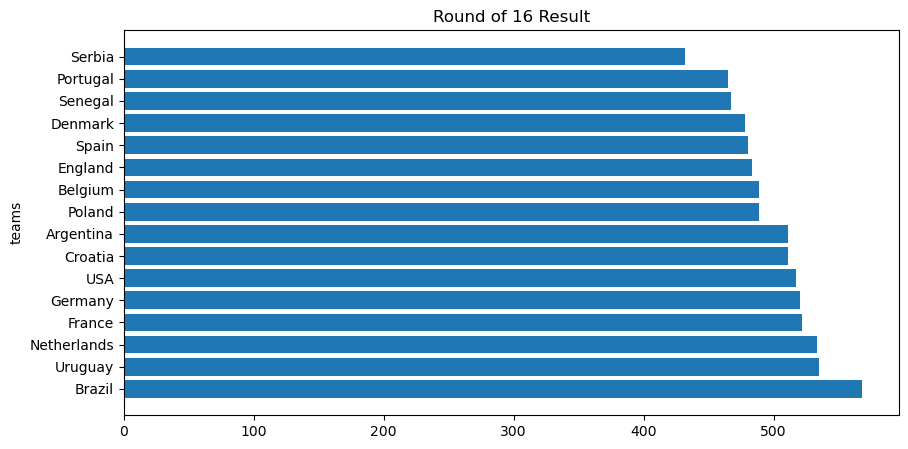

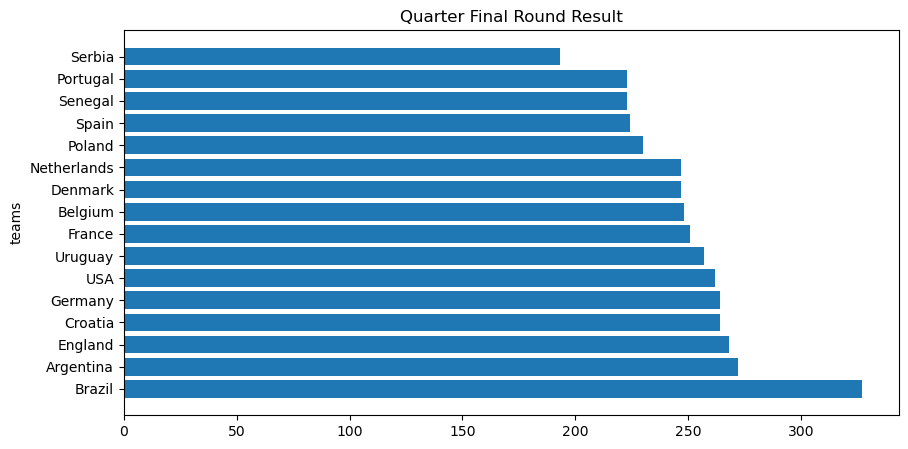

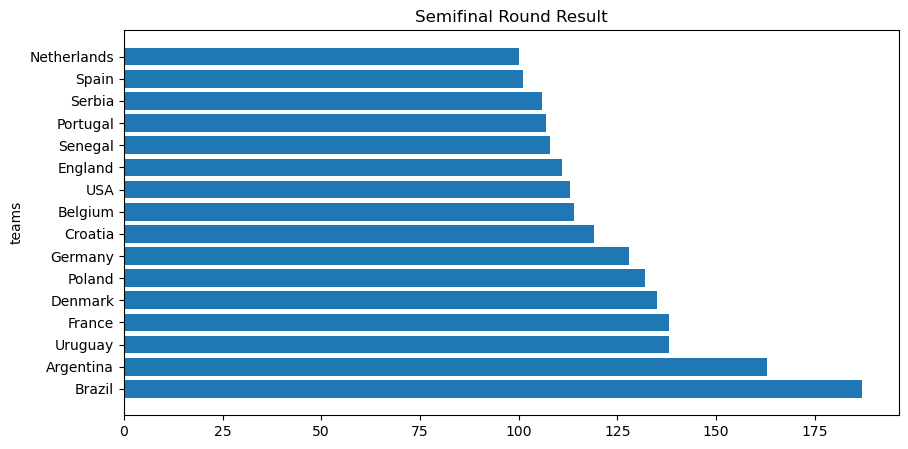

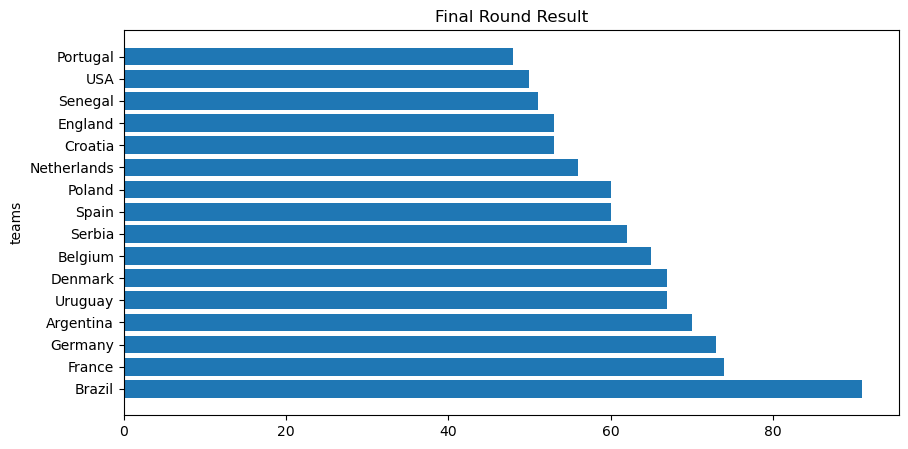

In [44]:
from collections import Counter
from matplotlib import figure

results = [results_round16, results_quarterfinal, results_semifinal, results_final]

for result in results:
    results = Counter(result).most_common()
    x,y = zip(*results)
    
    fig, ax = plt.subplots(figsize = (10, 5))
    
    ax.barh(x, y)
    ax.set_ylabel('teams')
    
    if result == results_round16:
        ax.set_title('Round of 16 Result')
    if result == results_quarterfinal:
        ax.set_title('Quarter Final Round Result')
    if result == results_semifinal:
        ax.set_title('Semifinal Round Result')
    if result == results_final:
        ax.set_title('Final Round Result')

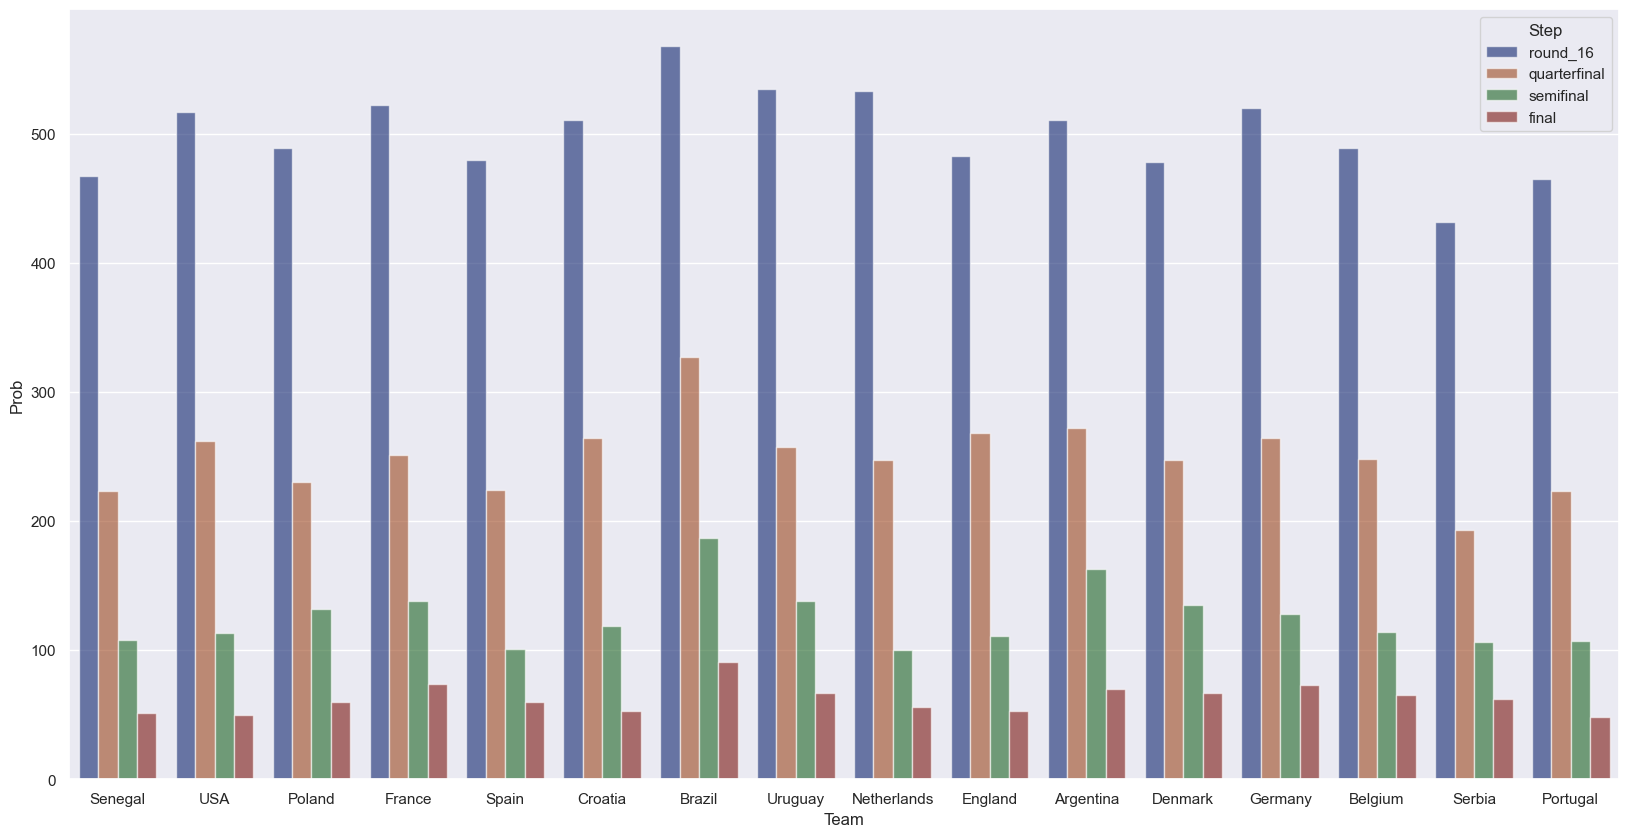

In [45]:
import seaborn as sns
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(20,10)})

g = sns.barplot(data=df_results, x="Team", y="Prob", hue="Step", estimator = sum, palette = 'dark', alpha = 0.6)

In [85]:
# Function that returns a dictionary with team as a key and winnings as a value
def count(results):
    result_count = {}
    for team in WC_2022:
        if results_round16.count(team) != 0:
            result_count[team] = results_round16.count(team)
    result_count = sorted(result_count.items(), key=lambda x:x[1])
    
    return result_count

In [96]:
# Function that returns a winner up for each round
def winners(count, stage):
    winner_up = []
    if stage == 16: # Round 16
        winner_up = list(count)[-8:]
    if stage == 8: # Quarther Final
        winner_up = list(count)[-4:]
    if stage == 4: # Semifinal  
        winner_up = list(count)[-2:]
    if stage == 2: # Final
        winner_up = list(count)[-1:]
    return winner_up

## Winners of Round 16

In [99]:
winners(count(result[0]), 16)

[('Argentina', 511),
 ('Croatia', 511),
 ('USA', 517),
 ('Germany', 520),
 ('France', 522),
 ('Netherlands', 533),
 ('Uruguay', 535),
 ('Brazil', 568)]

## Winners of the Quarther Final Round

In [102]:
winners(count(result[1]), 8)

[('France', 522), ('Netherlands', 533), ('Uruguay', 535), ('Brazil', 568)]

## Winners of the Semi Final Round

In [103]:
winners(count(result[2]), 4)

[('Uruguay', 535), ('Brazil', 568)]

## Winners of the Final Round

In [101]:
winners(count(result[3]), 2)

[('Brazil', 568)]

# Final Winner of the World Cup is Brazil